# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Anuj Dhumal


# **Project Summary -**

The goal is to analyze the content available on the platform, including movies and TV shows, to understand various aspects such as content distribution by type, release year trends, genre popularity, country-wise content availability, and audience ratings. The analysis aims to provide insights into the Amazon Prime Video content library that can be valuable for content strategy and user engagement.

# **GitHub Link -**

https://github.com/Anuj200204/EDA

# **Problem Statement**


This project explores the Amazon Prime Video dataset to understand what kind of content the platform offers and how it has evolved. The goal is to uncover:

Which genres and categories are most common?

How is content spread across different countries?

How has the library changed over the years?

Which shows are the most popular or highly rated?

By analyzing these patterns, we can gain valuable insights for businesses, content creators, and streaming platforms to make smarter decisions about content strategy, user engagement, and growth.

#### **Define Your Business Objective?**

The aim is to use insights from the Amazon Prime Video dataset to improve content strategy and boost user engagement. By understanding what kind of content performs well, what viewers prefer in terms of genres, rating, and how trends change over time, the platform can attract more users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno







### Merging two datasets

In [2]:
df2 = pd.read_csv('credits.csv')
df1 = pd.read_csv('titles.csv')
merged_df = pd.merge(df1, df2, on='id', how='right')
merged_df.to_csv('merged.csv', index=False)

### Dataset First View

### Dataset Rows & Columns count

In [3]:
df = pd.read_csv('merged.csv')
rows, columns = df.shape
print(f"Dataset contains {rows} rows and {columns} columns.")


Dataset contains 124347 rows and 19 columns.


#### Duplicate Values

In [4]:
duplicate_count = df.duplicated().sum()

print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 168


Dropping duplicate values

In [5]:
df.drop_duplicates(inplace=True, ignore_index=True)

#### Missing Values/Null Values

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67472
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
person_id                    0
name                         0
character                16277
role                         0
dtype: int64


Dropping rows which have no description as description is unique for rach film and tv show.

In [7]:
df.dropna(subset=['description'], inplace=True)

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

id                           0
title                        0
type                         0
description                  0
release_year                 0
age_certification        67412
runtime                      0
genres                       0
production_countries         0
seasons                 115987
imdb_id                   5234
imdb_score                5980
imdb_votes                6004
tmdb_popularity             13
tmdb_score               10143
person_id                    0
name                         0
character                16228
role                         0
dtype: int64


For age certification we will add unknown in missing values

In [9]:
df['age_certification'] = df['age_certification'].fillna('Unknown')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Making season=0 for movies as movies dont have seasons.

In [10]:
mask_movie = df['type'] == 'MOVIE'
df.loc[mask_movie, 'seasons']=0

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding 'NA' to the missing imdb_id

In [11]:
df['imdb_id'] = df['imdb_id'].fillna('NA')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding median value to missing imdb_score to prevent data loss.

In [12]:
df['imdb_score_missing'] = df['imdb_score'].isna()
median_score = df['imdb_score'].median()
df['imdb_score'] = df['imdb_score'].fillna(median_score)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding median value to missing imdb_votes to prevent data loss.

In [13]:
df['imdb_votes_missing'] = df['imdb_votes'].isna()
median_votes = df['imdb_votes'].median()
df['imdb_votes'] = df['imdb_votes'].fillna(median_votes)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding median value to missing tmdb_score to prevent data loss.

In [14]:
df['tmdb_score_missing'] = df['tmdb_score'].isna()
median_tmdb_score = df['tmdb_score'].median()
df['tmdb_score'] = df['tmdb_score'].fillna(median_tmdb_score)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding 'unknown' to the missing characers.

In [15]:
df['character']=df['character'].fillna('unknown')


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Adding median value to missing tmdb_popularity to prevent data loss.

In [16]:
df['tmdb_missing_popularity'] = df['tmdb_popularity'].isna()
median_tmdb_popularity = df['tmdb_popularity'].median()
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(median_tmdb_popularity)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Dropping extra columns that are added for the refernces.

In [17]:
df.drop(columns=['imdb_score_missing', 'imdb_votes_missing', 'tmdb_score_missing', 'tmdb_missing_popularity'], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

### What did you know about your dataset?

> Add blockquote



This dataset is a result of merging two datasets using a right join on the common column id. As a result, each movie or show appears multiple times — once for each actor and character associated with it.

## ***2. Understanding Your Variables***

In [18]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [19]:
df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,124088,124088,124088,124088,124088.000000,124088,124088.000000,124088,124088,124088.000000,124088,124088.000000,1.240880e+05,124088.000000,124088.000000,1.240880e+05,124088,124088,124088
unique,8842,8729,2,8833,NaN,12,NaN,1965,482,NaN,8263,NaN,NaN,NaN,NaN,NaN,79700,71071,2
top,tm458582,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,NaN,Unknown,NaN,['drama'],['US'],NaN,NA,NaN,NaN,NaN,NaN,NaN,George 'Gabby' Hayes,unknown,ACTOR
freq,137,137,115987,137,NaN,67412,NaN,9835,69208,NaN,5234,NaN,NaN,NaN,NaN,NaN,49,16228,115711
mean,NaN,NaN,NaN,NaN,1996.290608,NaN,95.602379,NaN,NaN,0.153069,NaN,5.974936,2.221417e+04,10.180229,6.000743,4.064595e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,27.755059,NaN,30.149757,NaN,NaN,0.989238,NaN,1.212078,8.642950e+04,40.777064,1.266004,5.616446e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1983.000000,NaN,83.000000,NaN,NaN,0.000000,NaN,5.300000,3.160000e+02,1.886000,5.400000,3.896475e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2009.000000,NaN,93.000000,NaN,NaN,0.000000,NaN,6.100000,1.258000e+03,3.896000,6.100000,1.339340e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,NaN,109.000000,NaN,NaN,0.000000,NaN,6.800000,6.359000e+03,8.801000,6.800000,5.712342e+05,NaN,NaN,NaN


### Variables Description


*   title: The title of the movie or TV show.
*   release_year: The year the movie or TV show was released.
*   age_certification: The age rating of the content (e.g., G, PG, PG-13, R). Missing values were filled with 'Unknown'.
*   runtime: The duration of the movie or TV show in minutes.
*   genres: A list of genres the content belongs to.
*   type: Indicates if the content is a 'MOVIE' or a 'SHOW'.
*   description: A brief summary or description of the content. Missing values were dropped.
*   imdb_id: The unique identifier for the content on IMDb. Missing values were filled with 'NA'.
*   imdb_score: The IMDb user score. Missing values were filled with the median score.
*   imdb_votes: The number of IMDb user votes. Missing values were filled with the median number of votes.
*   tmdb_score: The TMDb user score. Missing values were filled with the median score.
*   tmdb_popularity: The TMDb popularity score. Missing values were filled with the median popularity.
*   seasons: The number of seasons for a TV show. Movies had this set to 0.
*   character: The name of the character in the movie or TV show. Missing values were filled with 'unknown'.
*   id: The unique identifier used to merge the two original datasets.
*   name: The name of the actor or person associated with the character.
*   role: The role of the person (e.g., ACTOR).


### Check Unique Values for each variable.

In [20]:
for column in df.columns:
    print(f"Unique values for column '{column}': {df[column].nunique()}")

Unique values for column 'id': 8842
Unique values for column 'title': 8729
Unique values for column 'type': 2
Unique values for column 'description': 8833
Unique values for column 'release_year': 110
Unique values for column 'age_certification': 12
Unique values for column 'runtime': 204
Unique values for column 'genres': 1965
Unique values for column 'production_countries': 482
Unique values for column 'seasons': 31
Unique values for column 'imdb_id': 8263
Unique values for column 'imdb_score': 85
Unique values for column 'imdb_votes': 3623
Unique values for column 'tmdb_popularity': 5263
Unique values for column 'tmdb_score': 88
Unique values for column 'person_id': 80447
Unique values for column 'name': 79700
Unique values for column 'character': 71071
Unique values for column 'role': 2


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#### Pie chart for movies vs TV Shows

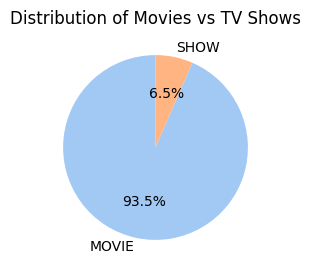

In [21]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel')[0:2])
plt.title('Distribution of Movies vs TV Shows')
plt.show()


##### 1. Why did you pick the specific chart?

It gives a clear definition of which type of contents dominates the platform in terms of number.

##### 2. What is/are the insight(s) found from the chart?

It show us that movies are dominating in amazon prime platforms in terms of number.

#### Chart - 2

#### Line plot for number of movies and TV shows relesed by year  

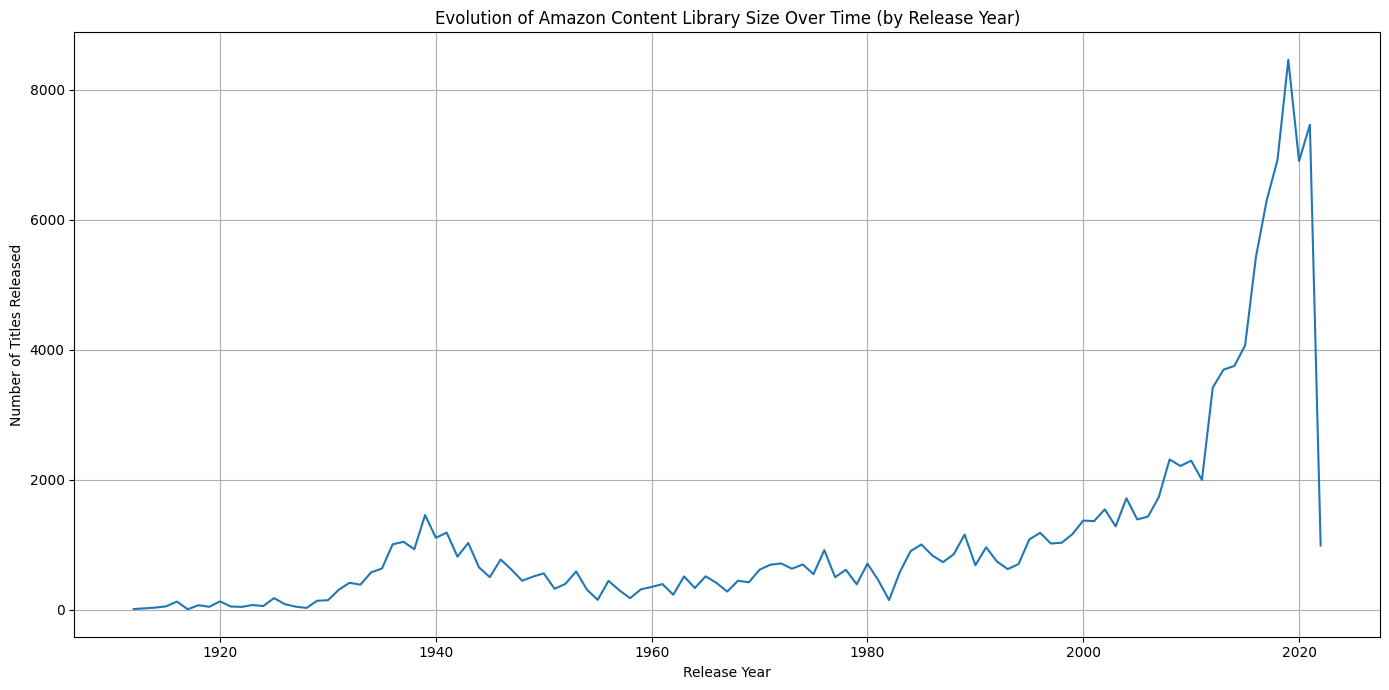

In [22]:
content_over_time_by_year = df['release_year'].value_counts().sort_index().reset_index()
content_over_time_by_year.columns = ['release_year', 'count']
content_over_time_by_year['release_year'] = pd.to_datetime(content_over_time_by_year['release_year'], format='%Y')
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=content_over_time_by_year,
    x='release_year',
    y='count'
)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.title('Evolution of Amazon Content Library Size Over Time (by Release Year)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is suitable for showing trends over a continuous variable like time. It effectively visualizes the number of titles released each year and how this quantity changes over time, allowing us to see growth patterns or periods of decline.


##### 2. What is/are the insight(s) found from the chart?

 We can observe periods of significant increase in content from certain years, and identify if there are more recent releases than older ones being added or represented in the dataset.


#### Chart - 3

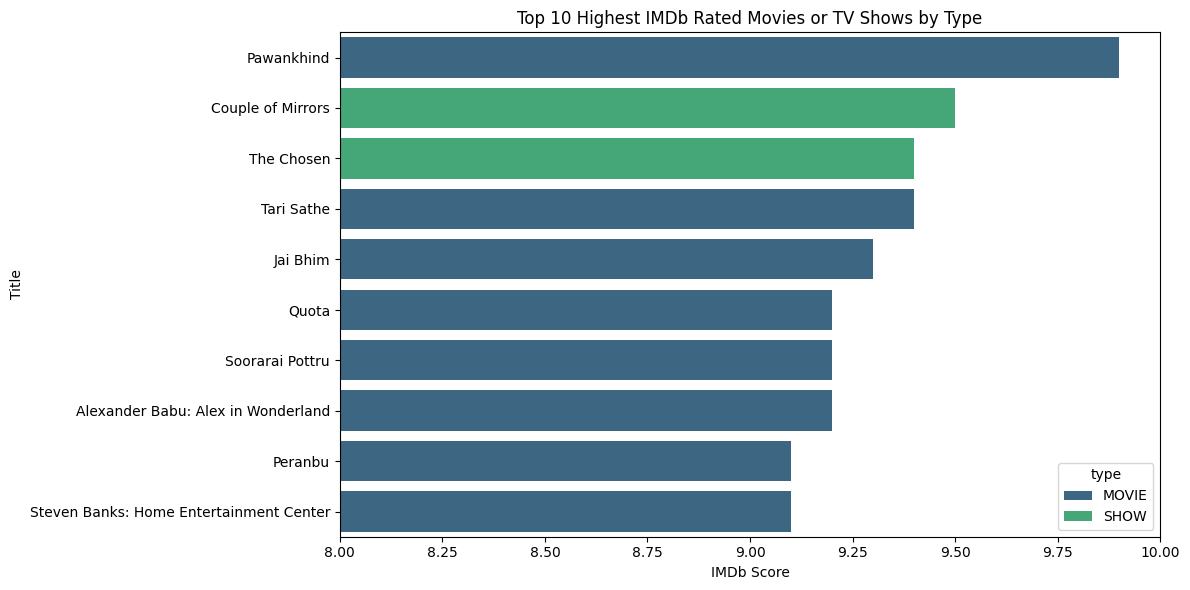

In [23]:
df_original_scores = df[df['imdb_score'] != median_score].copy()
df_unique_titles = df_original_scores.drop_duplicates(subset=['title', 'release_year', 'type']).copy()
top_10_imdb_scores = df_unique_titles.sort_values(by='imdb_score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='imdb_score', y='title', data=top_10_imdb_scores, palette='viridis', hue='type')
plt.title('Top 10 Highest IMDb Rated Movies or TV Shows by Type')
plt.xlabel('IMDb Score')
plt.ylabel('Title')
plt.xlim(8.0, 10.0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot is excellent for displaying the top N items with a numerical value. It allows for clear labeling and easy comparison of scores.

##### 2. What is/are the insight(s) found from the chart?

This chart identifies the absolute top 10 titles (movies or TV shows) on the platform based on their IMDb scores. It shows that 8 out of 10 top rated contents are movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Featuring these top-rated movies in marketing and on the homepage can help attract viewers who look for popular or highly rated films. Showing them in special sections or curated lists makes it easier for users to find and watch quality content.



#### Chart - 4

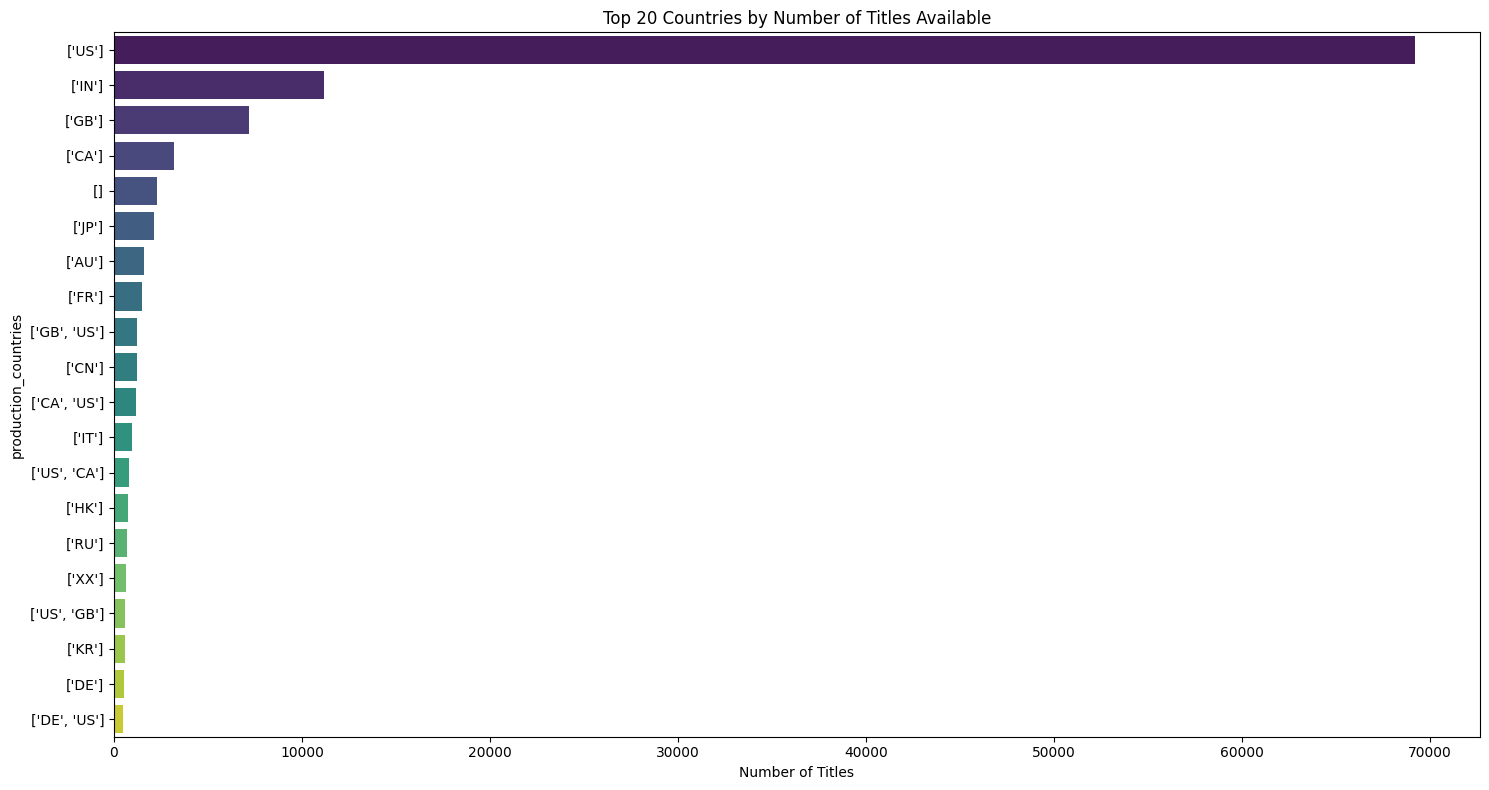

In [24]:

country_distribution = df['production_countries'].value_counts().reset_index()
country_distribution.columns = ['production_countries', 'count']
top_countries = country_distribution.head(20)
plt.figure(figsize=(15, 8))
sns.barplot( x='count', y='production_countries', data=top_countries,palette='viridis',hue='production_countries',
            legend=False )
plt.xlabel('Number of Titles')
plt.ylabel('production_countries')
plt.title('Top 20 Countries by Number of Titles Available')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 A horizontal bar chart is suitable for comparing the content volume across multiple distinct categories (countries). It allows for easy reading of country names, especially when there are several categories.


##### 2. What is/are the insight(s) found from the chart?

It can be seen that USA, India, Great Britain, Candada have added largest number of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can target this countries for engaging more audience.

#### Chart - 5

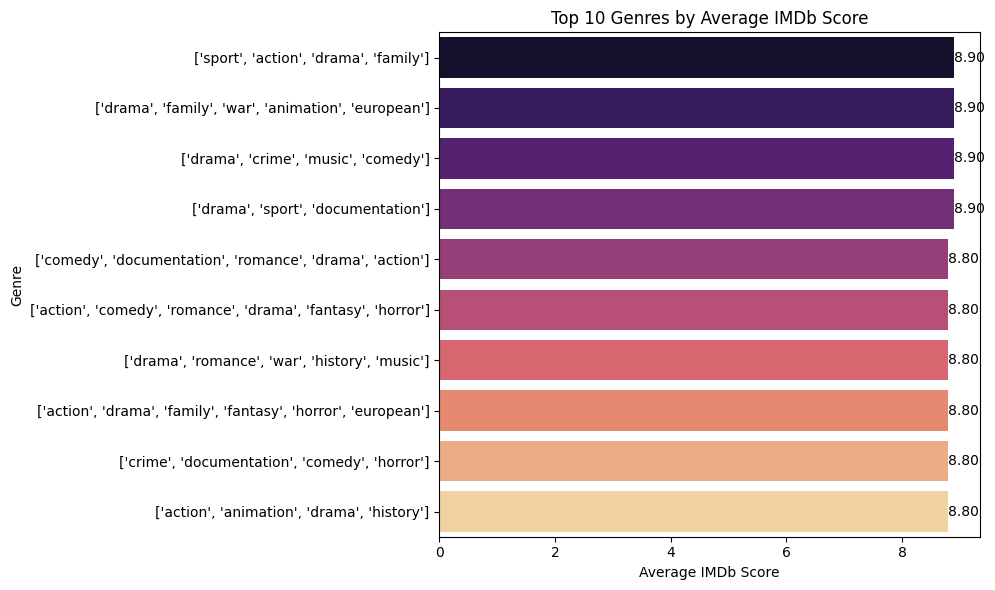

In [25]:
genre_score = df.groupby('genres')['imdb_score'].mean()
top10_score = genre_score.sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='imdb_score', y='genres',hue='genres',data=top10_score,palette='magma',
    legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average IMDb Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 A horizontal bar chart is effective for comparing the average IMDb scores across different genres, especially when dealing with multiple categories. It allows for clear ranking and easy visual comparison of the scores.


##### 2. What is/are the insight(s) found from the chart?

 This indicates which genres, on average, are rated most favorably by IMDb users. We can see which genres are perceived as having the highest quality content based on audience ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying the highest-rated genres, the platform can focus on sourcing or developing more content in those areas. These genres tend to do well and help keep viewers satisfied and engaged.

#### Chart - 6

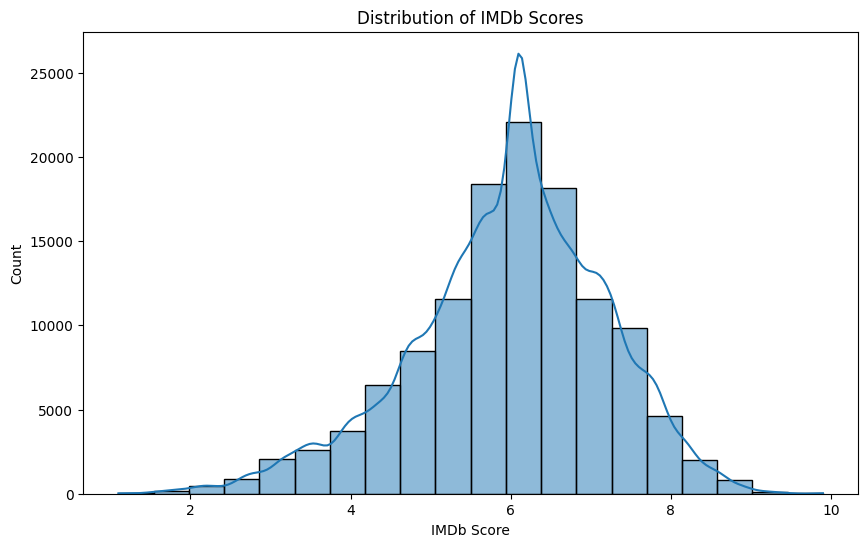

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='imdb_score', bins=20, kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.title('Distribution of IMDb Scores')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the ideal chart for visualizing the distribution of a single continuous numerical variable, like IMDb score. It shows the frequency of different score ranges, allowing us to understand the overall shape of the data, identify peaks, and observe the spread of scores.


##### 2. What is/are the insight(s) found from the chart?

The histogram shows how IMDb scores are distributed across the dataset. We can see the most common score range 6-7. It provides a quick summary of the quality distribution of content based on IMDb ratings.


##### 3. Will the gained insights help creating a positive business impact?
italicized text

The most content falls in the 6–7 IMDb score range helps the platform understand the overall quality of its library. Many titles have average ratings, the platform can work on adding more higher-rated content to improve user satisfaction.


#### Chart - 7

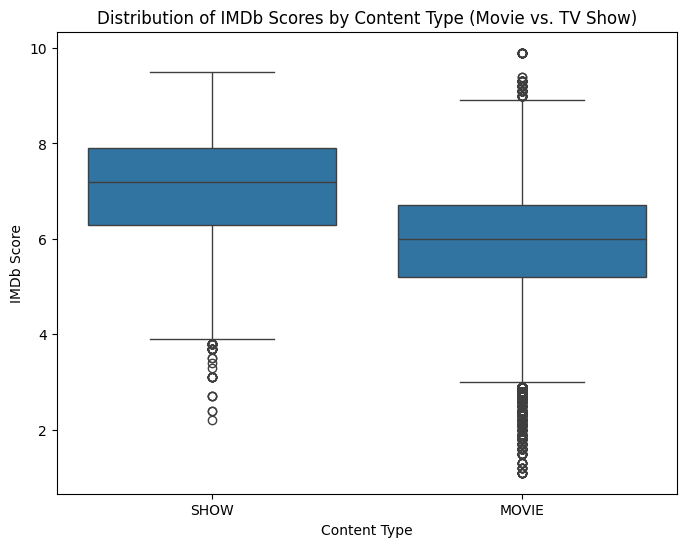

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='imdb_score', data=df)
plt.xlabel('Content Type')
plt.ylabel('IMDb Score')
plt.title('Distribution of IMDb Scores by Content Type (Movie vs. TV Show)')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is effective for comparing the distribution of a numerical variable (IMDb score) across different categories (Movie and TV Show). It visually summarizes key statistics like median, quartiles, and outliers for each category.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that most IMDb scores for movies range from 6 to 8, while for TV shows, they range from 5.5 to 6.5. The lowest IMDb rating for movies is around 2, while some TV shows have ratings below 2.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To make the content better and keep viewers happy, the platform can work on improving TV shows by adding better ones or creating higher-quality shows. Showing top-rated movies more clearly can help bring in new users and keep current ones interested. Also, fixing or removing low-rated content can make the platform look more trustworthy and improve its overall image.












#### Chart - 8

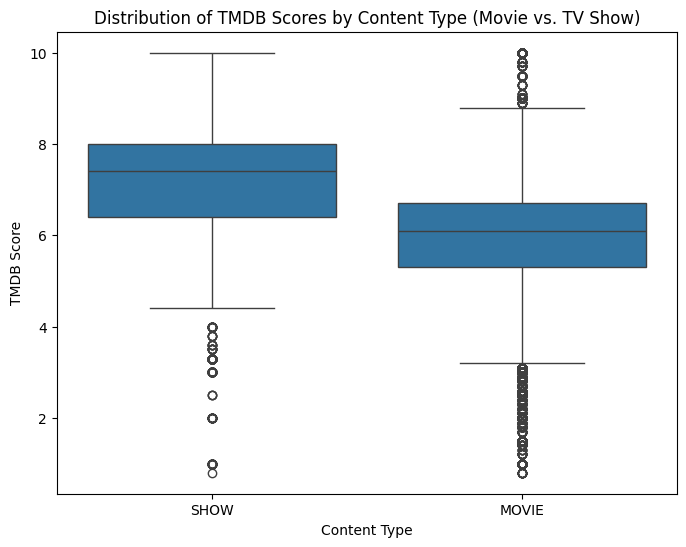

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='tmdb_score', data=df)
plt.xlabel('Content Type')
plt.ylabel('TMDB Score')
plt.title('Distribution of TMDB Scores by Content Type (Movie vs. TV Show)')
plt.show()


##### 1. Why did you pick the specific chart?

Similar to the IMDb score analysis, a box plot is suitable for comparing the distribution of TMDB scores between the two content types: Movies and TV Shows. It provides a visual summary of the central tendency, spread, and outliers for TMDB scores within each category.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that most TMDb scores for movies range from 6 to 8, while for TV shows, they range from 5 to 6.5. And lowest TMDB rating is same for both.

#### Chart - 9

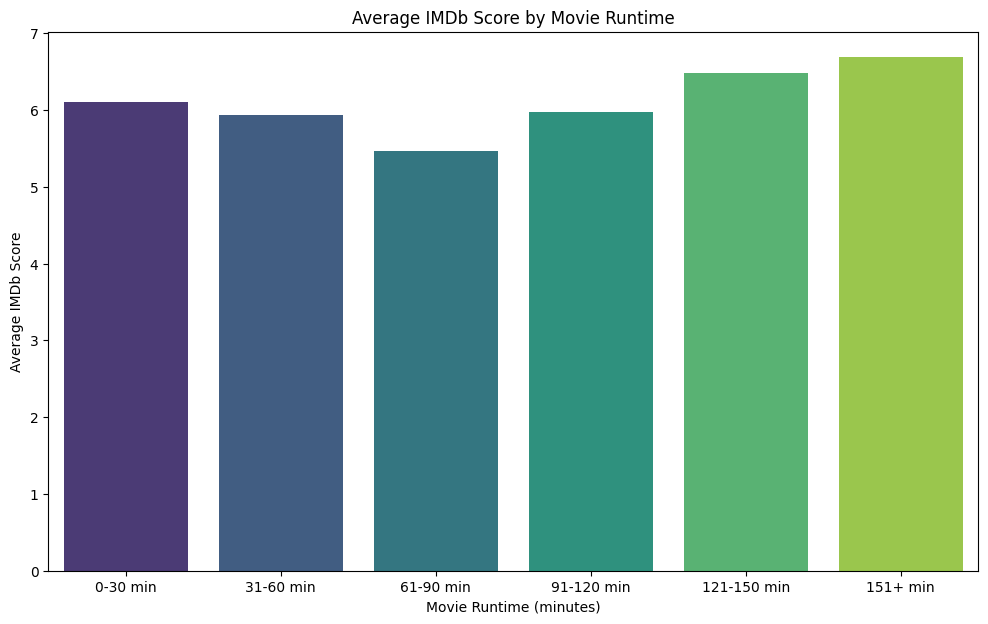

In [29]:
movies_df = df[df['type'] == 'MOVIE'].copy()
bins = [0, 30, 60, 90, 120, 150, movies_df['runtime'].max()]
labels = ['0-30 min', '31-60 min', '61-90 min', '91-120 min', '121-150 min', '151+ min']
movies_df['duration_bin'] = pd.cut(movies_df['runtime'], bins=bins, labels=labels, right=True)
avg_imdb_score_by_duration = movies_df.groupby('duration_bin', observed=True)['imdb_score'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x='duration_bin', y='imdb_score', data=avg_imdb_score_by_duration, palette='viridis', hue='duration_bin', legend=False)
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Movie Runtime')
plt.show()

##### 1. Why did you pick the specific chart?

 A vertical bar plot was chosen to show the *average* IMDb score for movies grouped into specific duration.

##### 2. What is/are the insight(s) found from the chart?

It shows that movies with duration more than 150 has highest imdb ratings.

##### 3. Will the gained insights help creating a positive business impact?
This means viewers may prefer longer, more detailed movies. The platform can use this insight to promote or feature such movies more, and consider investing in or acquiring longer, high-quality films.

Answer Here

#### Chart - 10 - Correlation Heatmap

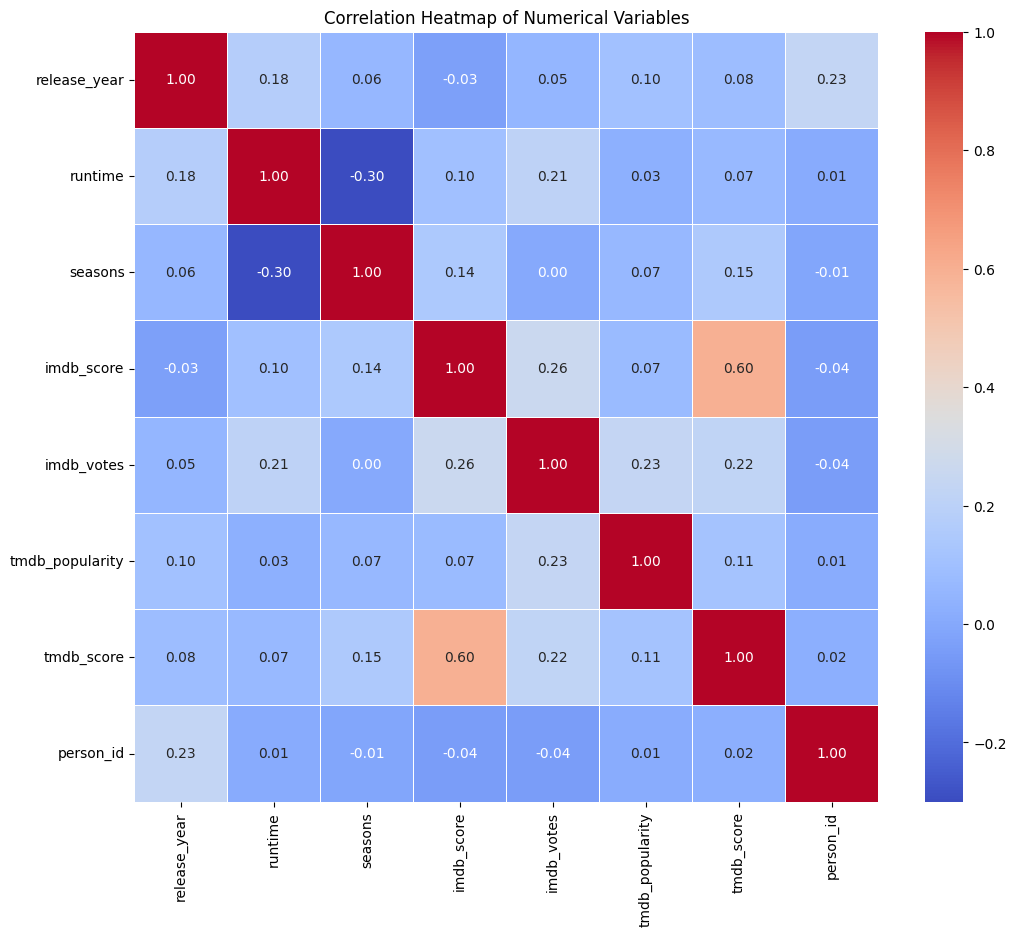

In [30]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

Correlation heatmaps are useful to visually represent the correlation matrix of a dataset, making it easier to identify relationships and patterns between variables.

##### 2. What is/are the insight(s) found from the chart?

This indicates that titles highly rated on IMDb tend to also be highly rated on TMDB, suggesting consistency in audience perception across these platforms.

#### Chart - 11 - Pair Plot

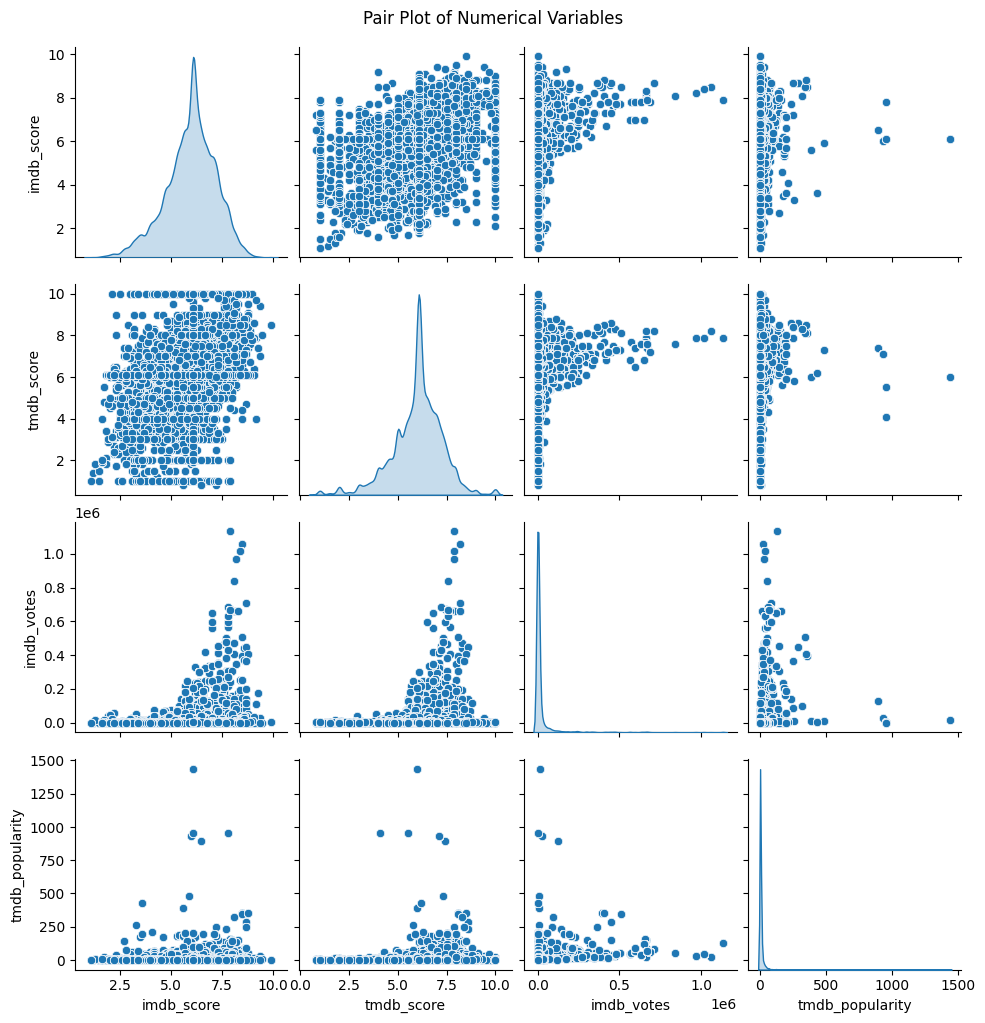

In [31]:
sns.pairplot(df[['imdb_score', 'tmdb_score', 'imdb_votes', 'tmdb_popularity']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title
plt.show()


##### 1. Why did you pick the specific chart?

 A pair plot is excellent for visualizing the relationships between all pairs of numerical variables in a dataset. It shows scatter plots for each pair and histograms/KDE plots for the distribution of individual variables on the diagonal. This allows for quick identification of correlations, clusters, and distributions.


##### 2. What is/are the insight(s) found from the chart?

 Yes. Understanding the relationships between these metrics is valuable. For example, a strong correlation between IMDb and TMDB scores suggests consistency in how these platforms rate content. Knowing which metrics are correlated with higher engagement (like votes or popularity) can help prioritize content acquisition or production focusing on characteristics associated with those metrics. For instance, if higher scores correlate strongly with more votes/popularity, focusing on high-quality content is a clear strategy. It also helps in potentially using one metric to infer another if one is missing or unavailable.


## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Focus on High-Quality and Popular Content**:
Prioritize adding or producing content that highly rated on IMDb and TMDB, especially in top-performing genres . High-rated TV shows and movies attracts viewers.

**2. Promote What Works:**
Highlight genres and titles that are already popular and well-rated. Use these in marketing campaigns and platform recommendations to boost engagement.

**3. Keep the Library Fresh and Diverse:**
Ensure a good mix of classic and new content. Expand content from underrepresented regions and adjust based on audience demand.

**4. Make Smarter** **Recommendations**  
Use data from ratings, genres, runtimes, and popularity to improve recommendation algorithms, helping users discover content they’ll love.

**5. Fix Weak Spots:**
Find areas where content underperforms—like certain genres or durations—and work to improve or replace them. Also, ensure data quality is strong for better analysis.

**6. Understand Your Viewers:**
Dig deeper into what actors, characters, and types of stories audiences connect with. Use this to guide casting and content strategy.

# **Conclusion**

1. Movies dominate the platform in terms of number
2. US adds highest number of contents on the platform.
3. Movies which have running time more than 2.5 hrs have high imdb rating.
4. The content library expands as the years progress.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***